In [42]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 
import category_encoders as ce
import re 
import os
import scipy.stats as stats
import statistics
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder
from datasist.structdata import detect_outliers
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_hist_gradient_boosting

In [43]:
df=pd.read_csv("train.csv")
display(df)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [44]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

None

In [45]:
print("Number of nulls in each column:")
print(df.isnull().sum())

Number of nulls in each column:
ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


In [46]:
df=df.drop(["ID","Name","SSN"], axis=1)
print("Dropping unnecessary columns of all unique values:")
display(df)

Dropping unnecessary columns of all unique values:


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [47]:
num_col_to_fix=["Age","Annual_Income","Num_of_Loan","Num_of_Delayed_Payment","Changed_Credit_Limit",
             "Outstanding_Debt","Amount_invested_monthly","Monthly_Balance"]
def fix_nums(num):
    try:
        return float(num.replace("_",""))
    except:
        return np.nan    

In [48]:
for col in num_col_to_fix:
    df[col]=df[col].apply(fix_nums)   

In [49]:
display(df[num_col_to_fix])

,Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,4.0,7.0,11.27,809.98,80.415295,312.494089
1,23.0,19114.12,4.0,NaN,11.27,809.98,118.280222,284.629162
2,-500.0,19114.12,4.0,7.0,NaN,809.98,81.699521,331.209863
3,23.0,19114.12,4.0,4.0,6.27,809.98,199.458074,223.451310
4,23.0,19114.12,4.0,NaN,11.27,809.98,41.420153,341.489231
...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,2.0,7.0,11.50,502.38,60.971333,NaN
99996,25.0,39628.99,2.0,7.0,11.50,502.38,54.185950,NaN
99997,25.0,39628.99,2.0,6.0,11.50,502.38,24.028477,NaN
99998,25.0,39628.99,2.0,NaN,11.50,502.38,251.672582,NaN


In [50]:
print(df["Type_of_Loan"].value_counts().head(16))

Type_of_Loan
Not Specified                             1408
Credit-Builder Loan                       1280
Personal Loan                             1272
Debt Consolidation Loan                   1264
Student Loan                              1240
Payday Loan                               1200
Mortgage Loan                             1176
Auto Loan                                 1152
Home Equity Loan                          1136
Personal Loan, and Student Loan            320
Not Specified, and Payday Loan             272
Mortgage Loan, and Home Equity Loan        264
Student Loan, and Payday Loan              256
Credit-Builder Loan, and Not Specified     248
Student Loan, and Credit-Builder Loan      248
Payday Loan, and Auto Loan                 240
Name: count, dtype: int64


In [51]:
loan_considered=df["Type_of_Loan"].value_counts().head(9).index[1:].to_list()
for i in loan_considered:
    df[i]=df["Type_of_Loan"].str.contains(i)
display(df[loan_considered])

,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,True,True,False,False,False,False,True,True
1,True,True,False,False,False,False,True,True
2,True,True,False,False,False,False,True,True
3,True,True,False,False,False,False,True,True
4,True,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...
99995,False,False,False,True,False,False,True,False
99996,False,False,False,True,False,False,True,False
99997,False,False,False,True,False,False,True,False
99998,False,False,False,True,False,False,True,False


In [52]:
for col in list(['Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan',
       'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']):
    df[col] = df[col].astype(float)

df=df.drop("Type_of_Loan", axis=1)    
display(df)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,312.494089,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,284.629162,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,331.209863,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,223.451310,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,341.489231,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,CUS_0x942c,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,CUS_0x942c,June,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,CUS_0x942c,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Standard,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [53]:
print("Checking the rows that have negative number of bank account:")
display(df[df["Num_Bank_Accounts"]<0])

Checking the rows that have negative number of bank account:


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
30330,CUS_0x4f2a,March,39.0,Engineer,128305.76,10434.146667,-1,6,1,2.0,...,855.904960,Standard,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30331,CUS_0x4f2a,April,40.0,Engineer,128305.76,NaN,-1,6,1,2.0,...,592.522928,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30332,CUS_0x4f2a,May,40.0,Engineer,128305.76,10434.146667,-1,6,1,2.0,...,936.730670,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30333,CUS_0x4f2a,June,40.0,Engineer,128305.76,10434.146667,-1,6,1,2.0,...,120.129276,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30334,CUS_0x4f2a,July,40.0,Engineer,128305.76,10434.146667,-1,6,1,2.0,...,913.835324,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30335,CUS_0x4f2a,August,40.0,Engineer,22136920.00,NaN,-1,6,1,2.0,...,758.155042,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
43689,CUS_0xa878,February,54.0,Engineer,117851.07,9870.922500,-1,6,7,0.0,...,588.947796,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43690,CUS_0xa878,March,54.0,Engineer,117851.07,9870.922500,-1,6,7,0.0,...,1084.772461,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43691,CUS_0xa878,April,54.0,Engineer,117851.07,9870.922500,-1,6,7,0.0,...,779.528327,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43692,CUS_0xa878,May,54.0,Engineer,117851.07,9870.922500,-1,6,7,0.0,...,1037.506338,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))
print("Converting all the number of bank accounts into absolute numbers:")
display(df["Num_Bank_Accounts"])

Converting all the number of bank accounts into absolute numbers:


0        3
1        3
2        3
3        3
4        3
        ..
99995    4
99996    4
99997    4
99998    4
99999    4
Name: Num_Bank_Accounts, Length: 100000, dtype: int64

In [55]:
print("Function to separate years and months from age and adding them to get total number of months.")
def fix_history_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan   
    
print("Applying function to fix credit the history age.")
df['Credit_History_Age'] = df['Credit_History_Age'].apply(fix_history_age)
display(df["Credit_History_Age"])    

Function to separate years and months from age and adding them to get total number of months.
Applying function to fix credit the history age.


0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

In [56]:
print("Payment of Minimum Amount Unique Values:")
display(df['Payment_of_Min_Amount'].unique())

Payment of Minimum Amount Unique Values:


array(['No', 'NM', 'Yes'], dtype=object)

In [57]:
print("Replacing NM with No.")
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)
display(df['Payment_of_Min_Amount'].unique())

Replacing NM with No.


array(['No', 'Yes'], dtype=object)

In [58]:
print("Unique values of Payment_Behaviour:")
display(df['Payment_Behaviour'].unique())

Unique values of Payment_Behaviour:


array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [59]:
print("Replacing special characters with null.")
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

Replacing special characters with null.


In [60]:
print("Checking the rows with unknown occupation:")
display(df[df["Occupation"]=="_______"])

Checking the rows with unknown occupation:


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
8,CUS_0x21b1,January,28.0,_______,34847.84,3037.986667,2,4,6,1.0,...,470.690627,Standard,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,CUS_0x2dbc,January,34.0,_______,143162.64,12187.220000,1,5,8,3.0,...,1043.315978,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,CUS_0x2dbc,March,34.0,_______,143162.64,NaN,1,5,8,3.0,...,715.741367,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20,CUS_0x2dbc,May,34.0,_______,143162.64,12187.220000,1,5,8,3.0,...,810.782153,Good,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29,CUS_0xb891,June,55.0,_______,30689.89,2612.490833,2,5,4,1.0,...,419.880784,Standard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,CUS_0x2654,January,37.0,_______,139664.96,11777.746667,3,6,12,4.0,...,NaN,Standard,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99935,CUS_0xb11c,August,38.0,_______,15319.65,1460.637500,6,7,15,4.0,...,NaN,Poor,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
99937,CUS_0xad4f,February,-500.0,_______,22620.79,1722.065833,7,3,9,0.0,...,NaN,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99943,CUS_0xad4f,August,48.0,_______,22620.79,NaN,6,2,9,0.0,...,NaN,Poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
print("Duplicate IDs spotted with different occupation. Fixing all the occupation rows.")
affected_ids=df[df["Occupation"]=="_______"]["Customer_ID"]
total_affected_ids=len(affected_ids)
k=0
for ID in affected_ids:
    k+=1
    print(f"In total of {total_affected_ids} rows, processing the {k}th row.", end='\r')
    oc=df[df["Customer_ID"]==ID]['Occupation'].mode()[0]
    df[df['Customer_ID'] == ID] = df[df['Customer_ID'] == ID].replace("_______",oc)
print("All replacements are completed.")

Duplicate IDs spotted with different occupation. Fixing all the occupation rows.
All replacements are completed.ng the 7062th row.


In [62]:
print("Checking occupation value counts after replacement with mode:")
display(df["Occupation"].value_counts())

Checking occupation value counts after replacement with mode:


Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
_______             5
Name: count, dtype: int64

In [63]:
print("Replacing the rest of the 5 with their mode.")
df["Occupation"]=df["Occupation"].replace("_______", df["Occupation"].mode()[0])
display(df["Occupation"])

Replacing the rest of the 5 with their mode.


0        Scientist
1        Scientist
2        Scientist
3        Scientist
4        Scientist
           ...    
99995     Mechanic
99996     Mechanic
99997     Mechanic
99998     Mechanic
99999     Mechanic
Name: Occupation, Length: 100000, dtype: object

In [64]:
credit_mix_dic={"Bad": 0, "Standard": 1, "Good": 2, "-": np.nan}
print("Label encoding Credit Mix manually.")
df['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_dic)
display(df["Credit_Mix"].value_counts())

Label encoding Credit Mix manually.


Credit_Mix
1.0    36479
2.0    24337
0.0    18989
Name: count, dtype: int64

In [65]:
IDs = 1 
total_rows=df.shape[0]
for ID in df['Customer_ID'].unique() :
    print(f"Of {total_rows}, processing {IDs}th row.", end="\r")
    df['Customer_ID'] = df['Customer_ID'].replace(ID,IDs)
    IDs += 1
print("Replaced customer IDs with simple integer:")
display(df)

Replaced customer IDs with simple integer:


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,1,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,312.494089,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,284.629162,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,331.209863,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,223.451310,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,341.489231,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12500,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,12500,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,12500,June,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,...,NaN,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,12500,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,NaN,Standard,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [66]:
num_cols=df.select_dtypes(exclude='object').columns
print("Checking the number of numerical columns now:")
display(num_cols)

Checking the number of numerical columns now:


Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [67]:
print("Checking the number of nulls:")
display(df.isnull().sum())

Checking the number of nulls:


Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
Credit-Builder Loan         11408
Personal Loan               11408
Debt Consolidation Loan     11408
Student Loan                11408
Payday Loan                 11408
Mortgage Loan 

In [68]:
imputer=KNNImputer(n_neighbors=1)
Numericals = df.select_dtypes(exclude='object').columns[1:]
print("Imputing all the null values with nearest possible value using KNN Imputer.")
for col in Numericals[1:]:
    print(f"Processing on {col} column.")
    imputer.fit(df[['Customer_ID',col]])
    df[['Customer_ID',col]] = imputer.transform(df[['Customer_ID',col]])
print("All numerical null values imputed:")
display(df[Numericals])

Imputing all the null values with nearest possible value using KNN Imputer.
Processing on Annual_Income column.
Processing on Monthly_Inhand_Salary column.
Processing on Num_Bank_Accounts column.
Processing on Num_Credit_Card column.
Processing on Interest_Rate column.
Processing on Num_of_Loan column.
Processing on Delay_from_due_date column.
Processing on Num_of_Delayed_Payment column.
Processing on Changed_Credit_Limit column.
Processing on Num_Credit_Inquiries column.
Processing on Credit_Mix column.
Processing on Outstanding_Debt column.
Processing on Credit_Utilization_Ratio column.
Processing on Credit_History_Age column.
Processing on Total_EMI_per_month column.
Processing on Amount_invested_monthly column.
Processing on Monthly_Balance column.
Processing on Credit-Builder Loan column.
Processing on Personal Loan column.
Processing on Debt Consolidation Loan column.
Processing on Student Loan column.
Processing on Payday Loan column.
Processing on Mortgage Loan column.
Processi

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Amount_invested_monthly,Monthly_Balance,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,80.415295,3.124941e+02,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,118.280222,2.846292e+02,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,-500.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,81.699521,3.312099e+02,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,199.458074,2.234513e+02,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,11.27,...,41.420153,3.414892e+02,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,60.971333,-3.333333e+26,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,54.185950,-3.333333e+26,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,25.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,27.0,6.0,11.50,...,24.028477,-3.333333e+26,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,251.672582,-3.333333e+26,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [69]:
display(df["Payment_Behaviour"].value_counts())

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

In [70]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['Payment_Behaviour']])
print("Imputing all the null values withe most frequent values:")
df[['Payment_Behaviour']] = imputer.transform(df[['Payment_Behaviour']])
display(df["Payment_Behaviour"].isnull().sum())

Imputing all the null values withe most frequent values:


0

In [71]:
display(df["Payment_Behaviour"].value_counts())

Payment_Behaviour
Low_spent_Small_value_payments      33113
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

In [72]:
print("Replacing the outliers with median:")
tc,k=len(Numericals), 0
for col in Numericals:
    print(f"Processing the {col} column.")
    outliers_indices=detect_outliers(df,0,[col])
    median=df[col].median()
    df[col].iloc[outliers_indices]=median
display(df)

Replacing the outliers with median:
Processing the Age column.
Processing the Annual_Income column.
Processing the Monthly_Inhand_Salary column.
Processing the Num_Bank_Accounts column.
Processing the Num_Credit_Card column.
Processing the Interest_Rate column.
Processing the Num_of_Loan column.
Processing the Delay_from_due_date column.
Processing the Num_of_Delayed_Payment column.
Processing the Changed_Credit_Limit column.
Processing the Num_Credit_Inquiries column.
Processing the Credit_Mix column.
Processing the Outstanding_Debt column.
Processing the Credit_Utilization_Ratio column.
Processing the Credit_History_Age column.
Processing the Total_EMI_per_month column.
Processing the Amount_invested_monthly column.
Processing the Monthly_Balance column.
Processing the Credit-Builder Loan column.
Processing the Personal Loan column.
Processing the Debt Consolidation Loan column.
Processing the Student Loan column.
Processing the Payday Loan column.
Processing the Mortgage Loan column

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,1.0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,312.494089,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,284.629162,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,March,33.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,331.209863,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,223.451310,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,341.489231,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12500.0,April,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,332.021453,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,12500.0,May,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,332.021453,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,12500.0,June,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,13.0,2.0,...,332.021453,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,12500.0,July,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,332.021453,Standard,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [73]:
print("Saving the cleaned dataset to csv file:")
df.to_csv("Train_Cleaned_Data.csv")

Saving the cleaned dataset to csv file:


In [74]:
df=pd.read_csv("Train_Cleaned_Data.csv")
display(df)

,Unnamed: 0,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,0,1.0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,312.494089,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,1.0,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,284.629162,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,1.0,March,33.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,331.209863,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,3,1.0,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,223.451310,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,4,1.0,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,...,341.489231,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,12500.0,April,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,332.021453,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,99996,12500.0,May,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,332.021453,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,99997,12500.0,June,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,13.0,...,332.021453,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,99998,12500.0,July,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,...,332.021453,Standard,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [75]:
display(df.select_dtypes(include="object"))

,Month,Occupation,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,No,High_spent_Small_value_payments,Good
1,February,Scientist,No,Low_spent_Large_value_payments,Good
2,March,Scientist,No,Low_spent_Medium_value_payments,Good
3,April,Scientist,No,Low_spent_Small_value_payments,Good
4,May,Scientist,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,April,Mechanic,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,No,High_spent_Large_value_payments,Poor
99998,July,Mechanic,No,Low_spent_Large_value_payments,Standard


Processing the column Month.
Processing the column Occupation.
Processing the column Payment_of_Min_Amount.
Processing the column Payment_Behaviour.


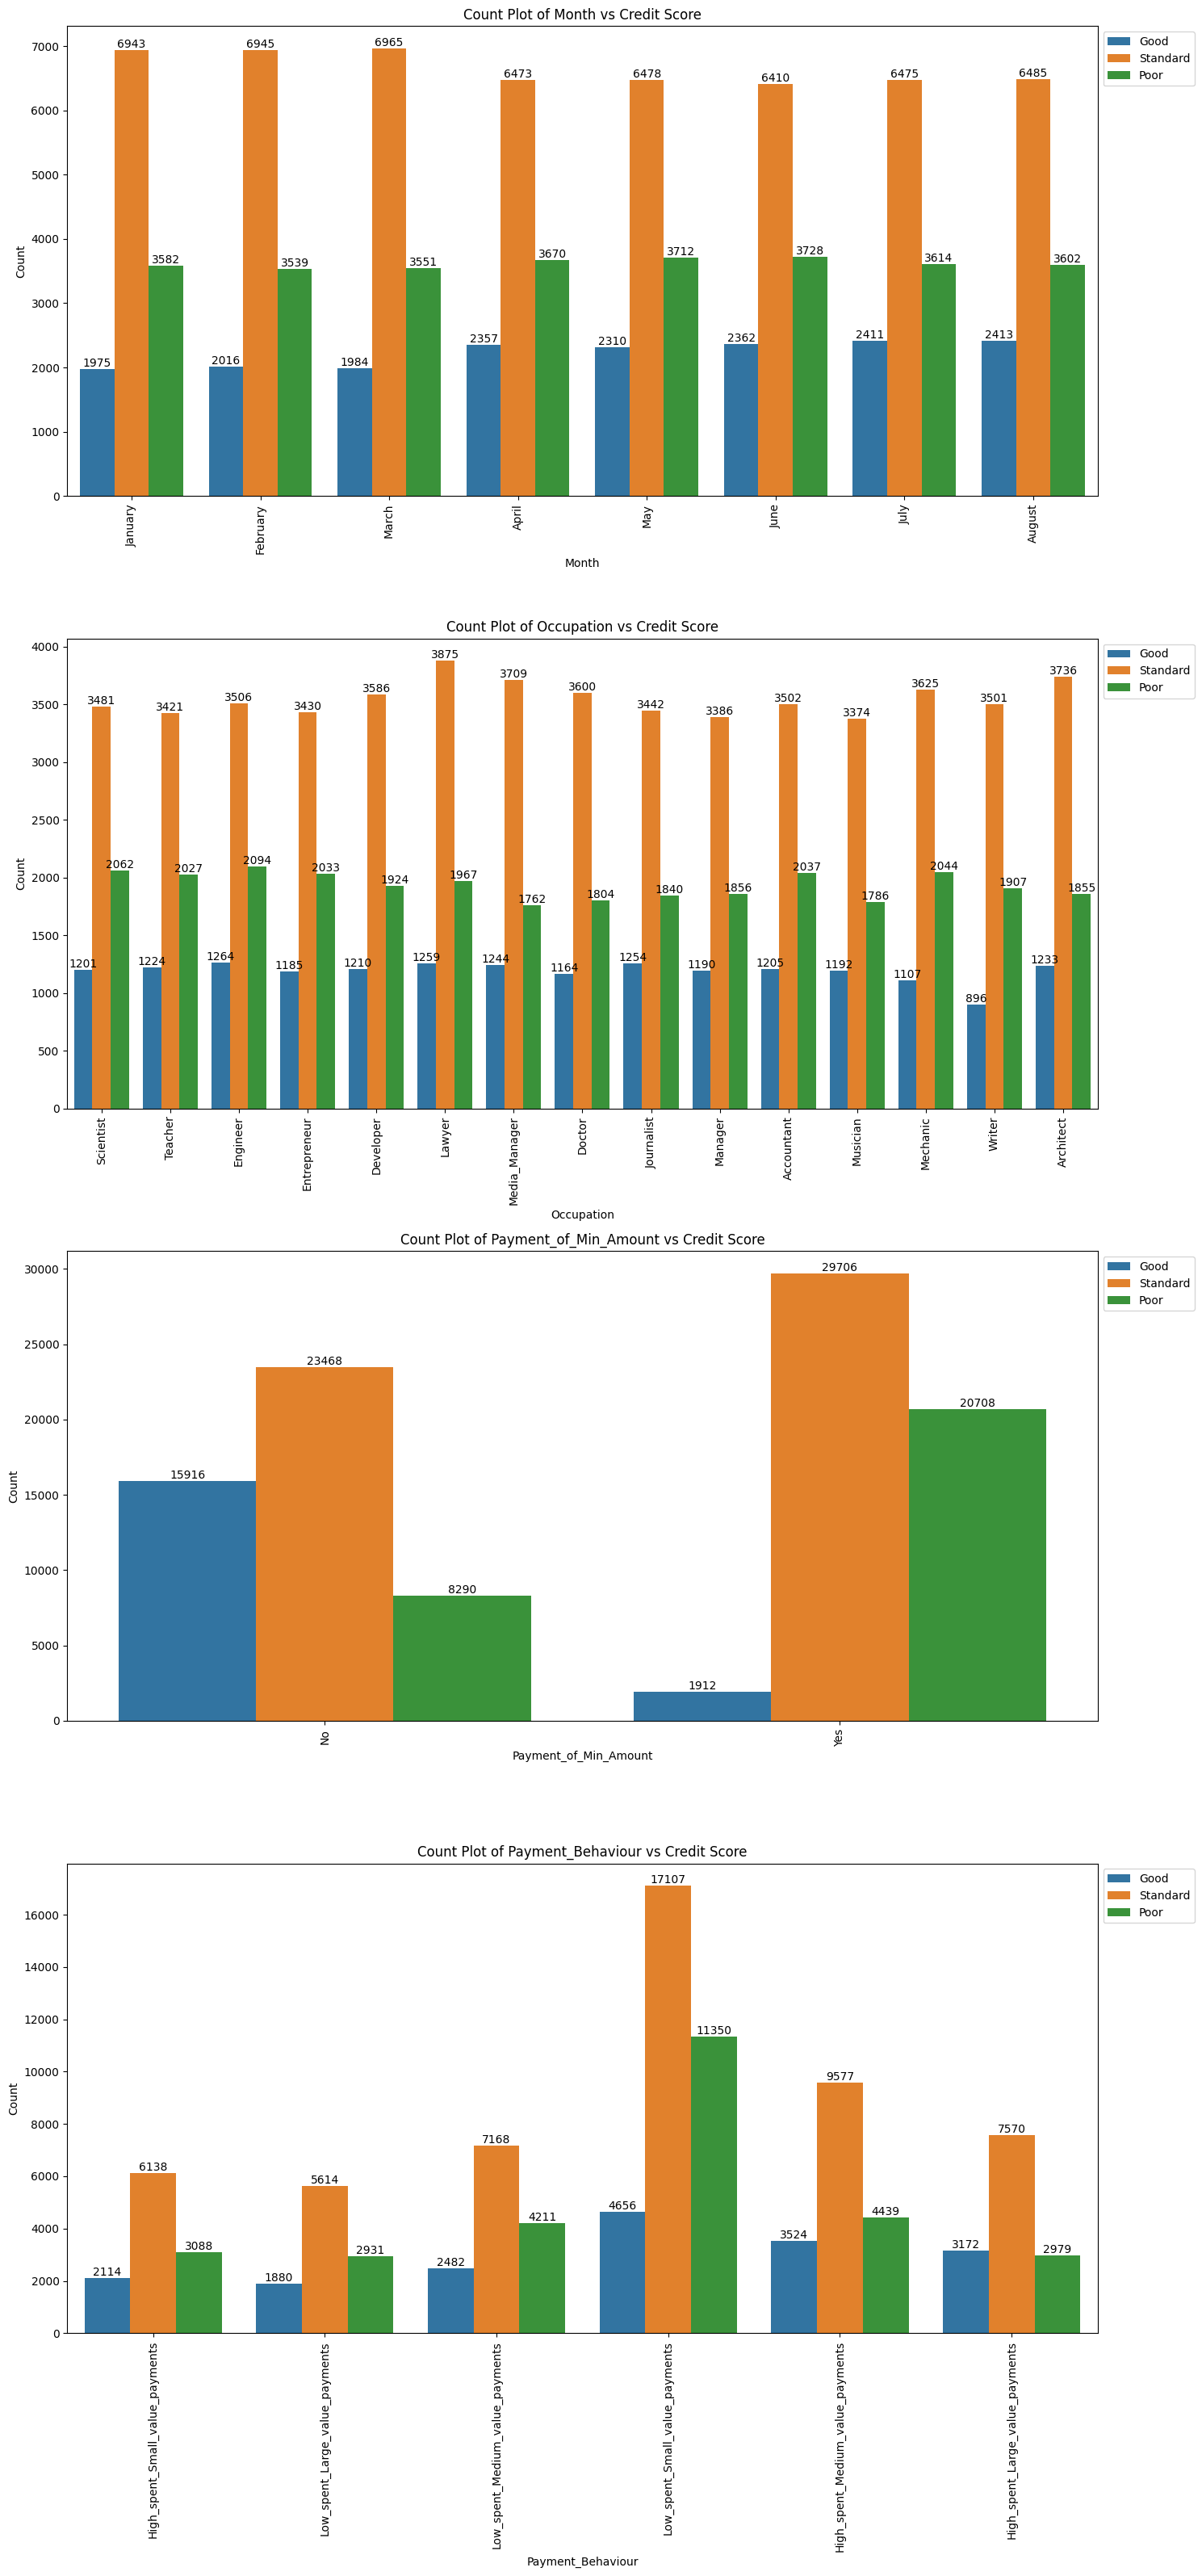

In [76]:
cat_cols=["Month", "Occupation","Payment_of_Min_Amount","Payment_Behaviour"]
num_rows=len(cat_cols)
fig, axes = plt.subplots(num_rows, 1,figsize=(15,8*num_rows))
for i, col in enumerate(cat_cols):
    print(f"Processing the column {col}.")
    ax=axes[i]
    sns.countplot(x=col, hue="Credit_Score", data=df, ax=ax)
    for c in ax.containers:
        ax.bar_label(c,label_type="edge")
    ax.set_title(f"Count Plot of {col} vs Credit Score")
    ax.set_xlabel(f"{col}")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.set_ylabel("Count")
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

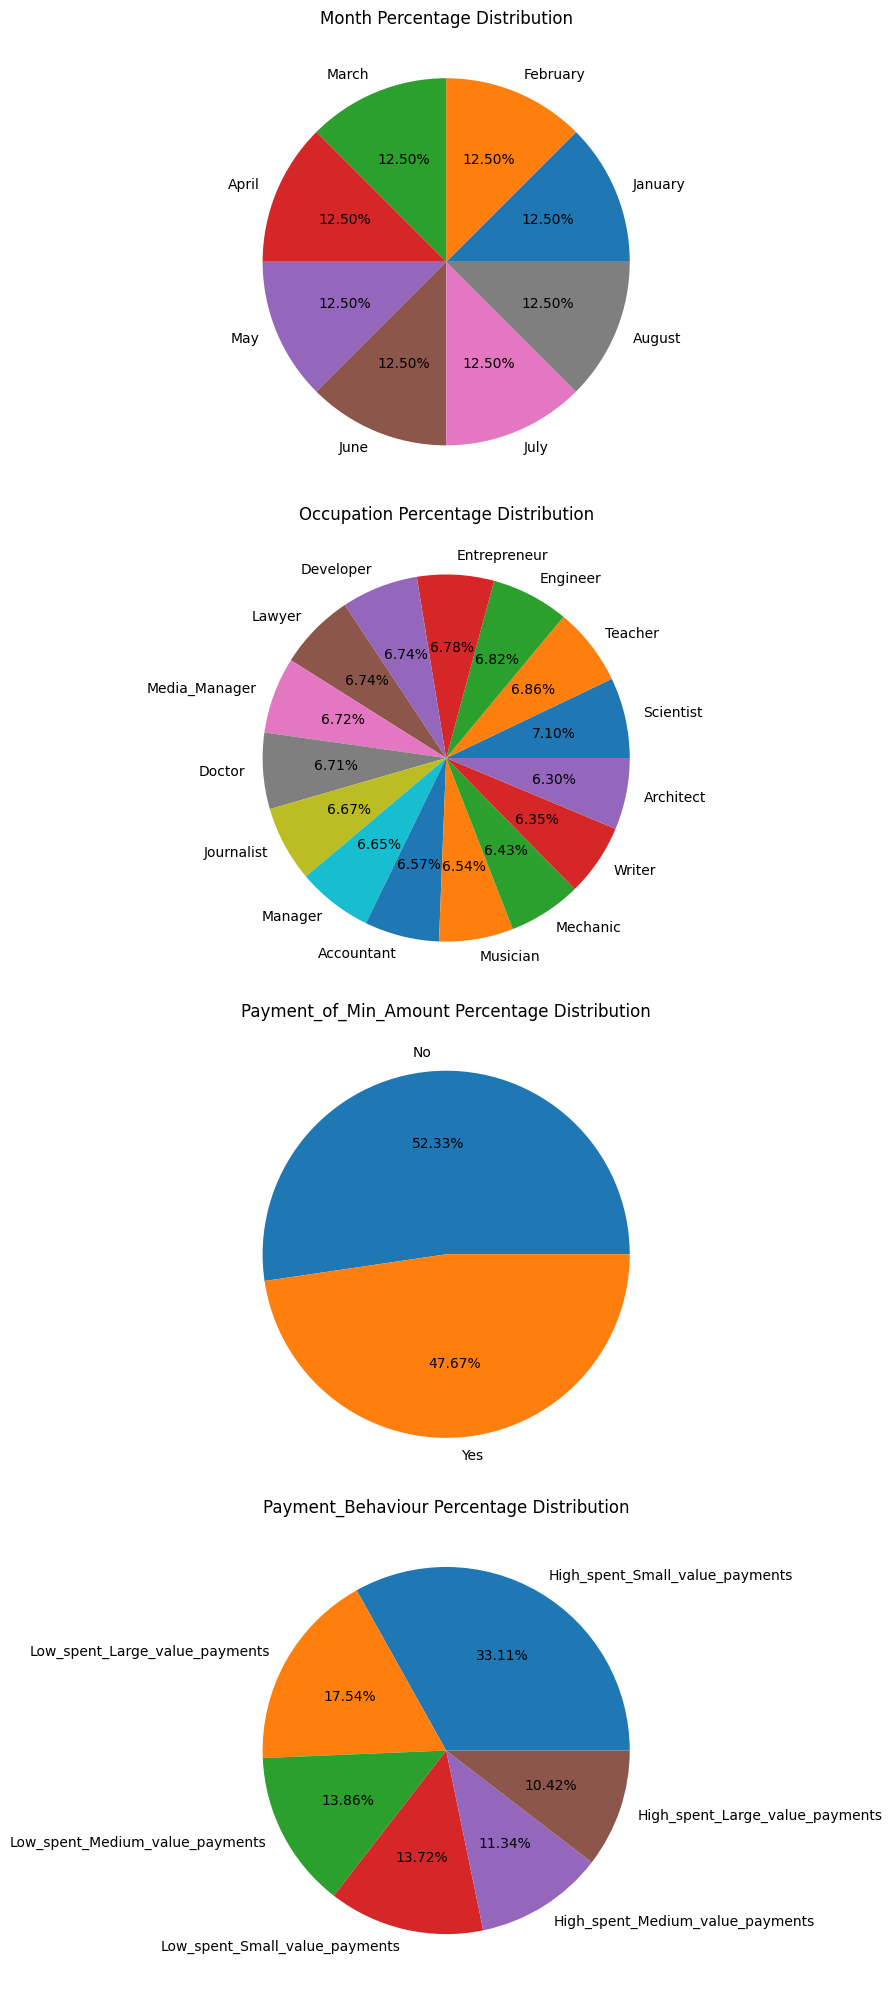

In [77]:
fig, axes = plt.subplots(num_rows, 1,figsize=(15,5*num_rows))
for i, col in enumerate(cat_cols):
    ax=axes[i]
    ax.pie(df[col].value_counts().tolist(),labels=list(df[col].unique().tolist()), autopct='%1.2f%%')
    ax.set_title(f"{col} Percentage Distribution")
plt.tight_layout()
plt.show()

In [78]:
cred_score={"Poor": 0,"Standard":1,"Good": 2}
df["Credit_Score"]=df["Credit_Score"].map(cred_score)
display(df["Credit_Score"])

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [79]:
df=df.drop(["Unnamed: 0","Customer_ID"], axis=1)
print("Removing unneccary columns:")
display(df)

Removing unneccary columns:


,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,312.494089,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,...,284.629162,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,March,33.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,331.209863,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,223.451310,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,341.489231,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,332.021453,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,May,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,...,332.021453,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,June,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,...,332.021453,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,July,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,...,332.021453,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [80]:
occupation_considered=df["Occupation"].unique()
for occupation in occupation_considered:
    df[occupation] = (df['Occupation'] == occupation).astype(float)
print("Making separate column for each occupation:")
df=df.drop("Occupation", axis=1)
display(df)

Making separate column for each occupation:


,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Lawyer,Media_Manager,Doctor,Journalist,Manager,Accountant,Musician,Mechanic,Writer,Architect
0,January,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,February,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,March,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,April,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,May,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99996,May,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99997,June,25.0,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,July,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
df=df.drop("Month", axis=1)
display(df)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Lawyer,Media_Manager,Doctor,Journalist,Manager,Accountant,Musician,Mechanic,Writer,Architect
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99997,25.0,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,11.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
payment_behaviour_considered=df["Payment_Behaviour"].unique()
for payment_behaviour in payment_behaviour_considered:
    df[payment_behaviour] = (df['Payment_Behaviour'] == payment_behaviour).astype(float)
print("Making separate column for each Payment Behaviour:")
df=df.drop("Payment_Behaviour", axis=1)
display(df)

Making separate column for each Payment Behaviour:


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Musician,Mechanic,Writer,Architect,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,High_spent_Medium_value_payments,High_spent_Large_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,25.0,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,11.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
df["Payment_of_Min_Amount"]=LabelEncoder().fit_transform(df["Payment_of_Min_Amount"])
print("Label Encoding the Payment of Minimum Amount:")
display(df)

Label Encoding the Payment of Minimum Amount:


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Musician,Mechanic,Writer,Architect,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,High_spent_Medium_value_payments,High_spent_Large_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,25.0,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,11.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [84]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Age                               100000 non-null  float64
 1   Annual_Income                     100000 non-null  float64
 2   Monthly_Inhand_Salary             100000 non-null  float64
 3   Num_Bank_Accounts                 100000 non-null  float64
 4   Num_Credit_Card                   100000 non-null  float64
 5   Interest_Rate                     100000 non-null  float64
 6   Num_of_Loan                       100000 non-null  float64
 7   Delay_from_due_date               100000 non-null  float64
 8   Num_of_Delayed_Payment            100000 non-null  float64
 9   Changed_Credit_Limit              100000 non-null  float64
 10  Num_Credit_Inquiries              100000 non-null  float64
 11  Credit_Mix                        100000 non-null  fl

None

In [85]:
df.to_csv("Train_Preprocessed.csv")

In [86]:
df=pd.read_csv("Train_Preprocessed.csv")
display(df)

,Unnamed: 0,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Musician,Mechanic,Writer,Architect,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,High_spent_Medium_value_payments,High_spent_Large_value_payments
0,0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,99997,25.0,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
df=df.drop("Unnamed: 0", axis=1)
display(df)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Musician,Mechanic,Writer,Architect,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,High_spent_Medium_value_payments,High_spent_Large_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,25.0,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,11.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


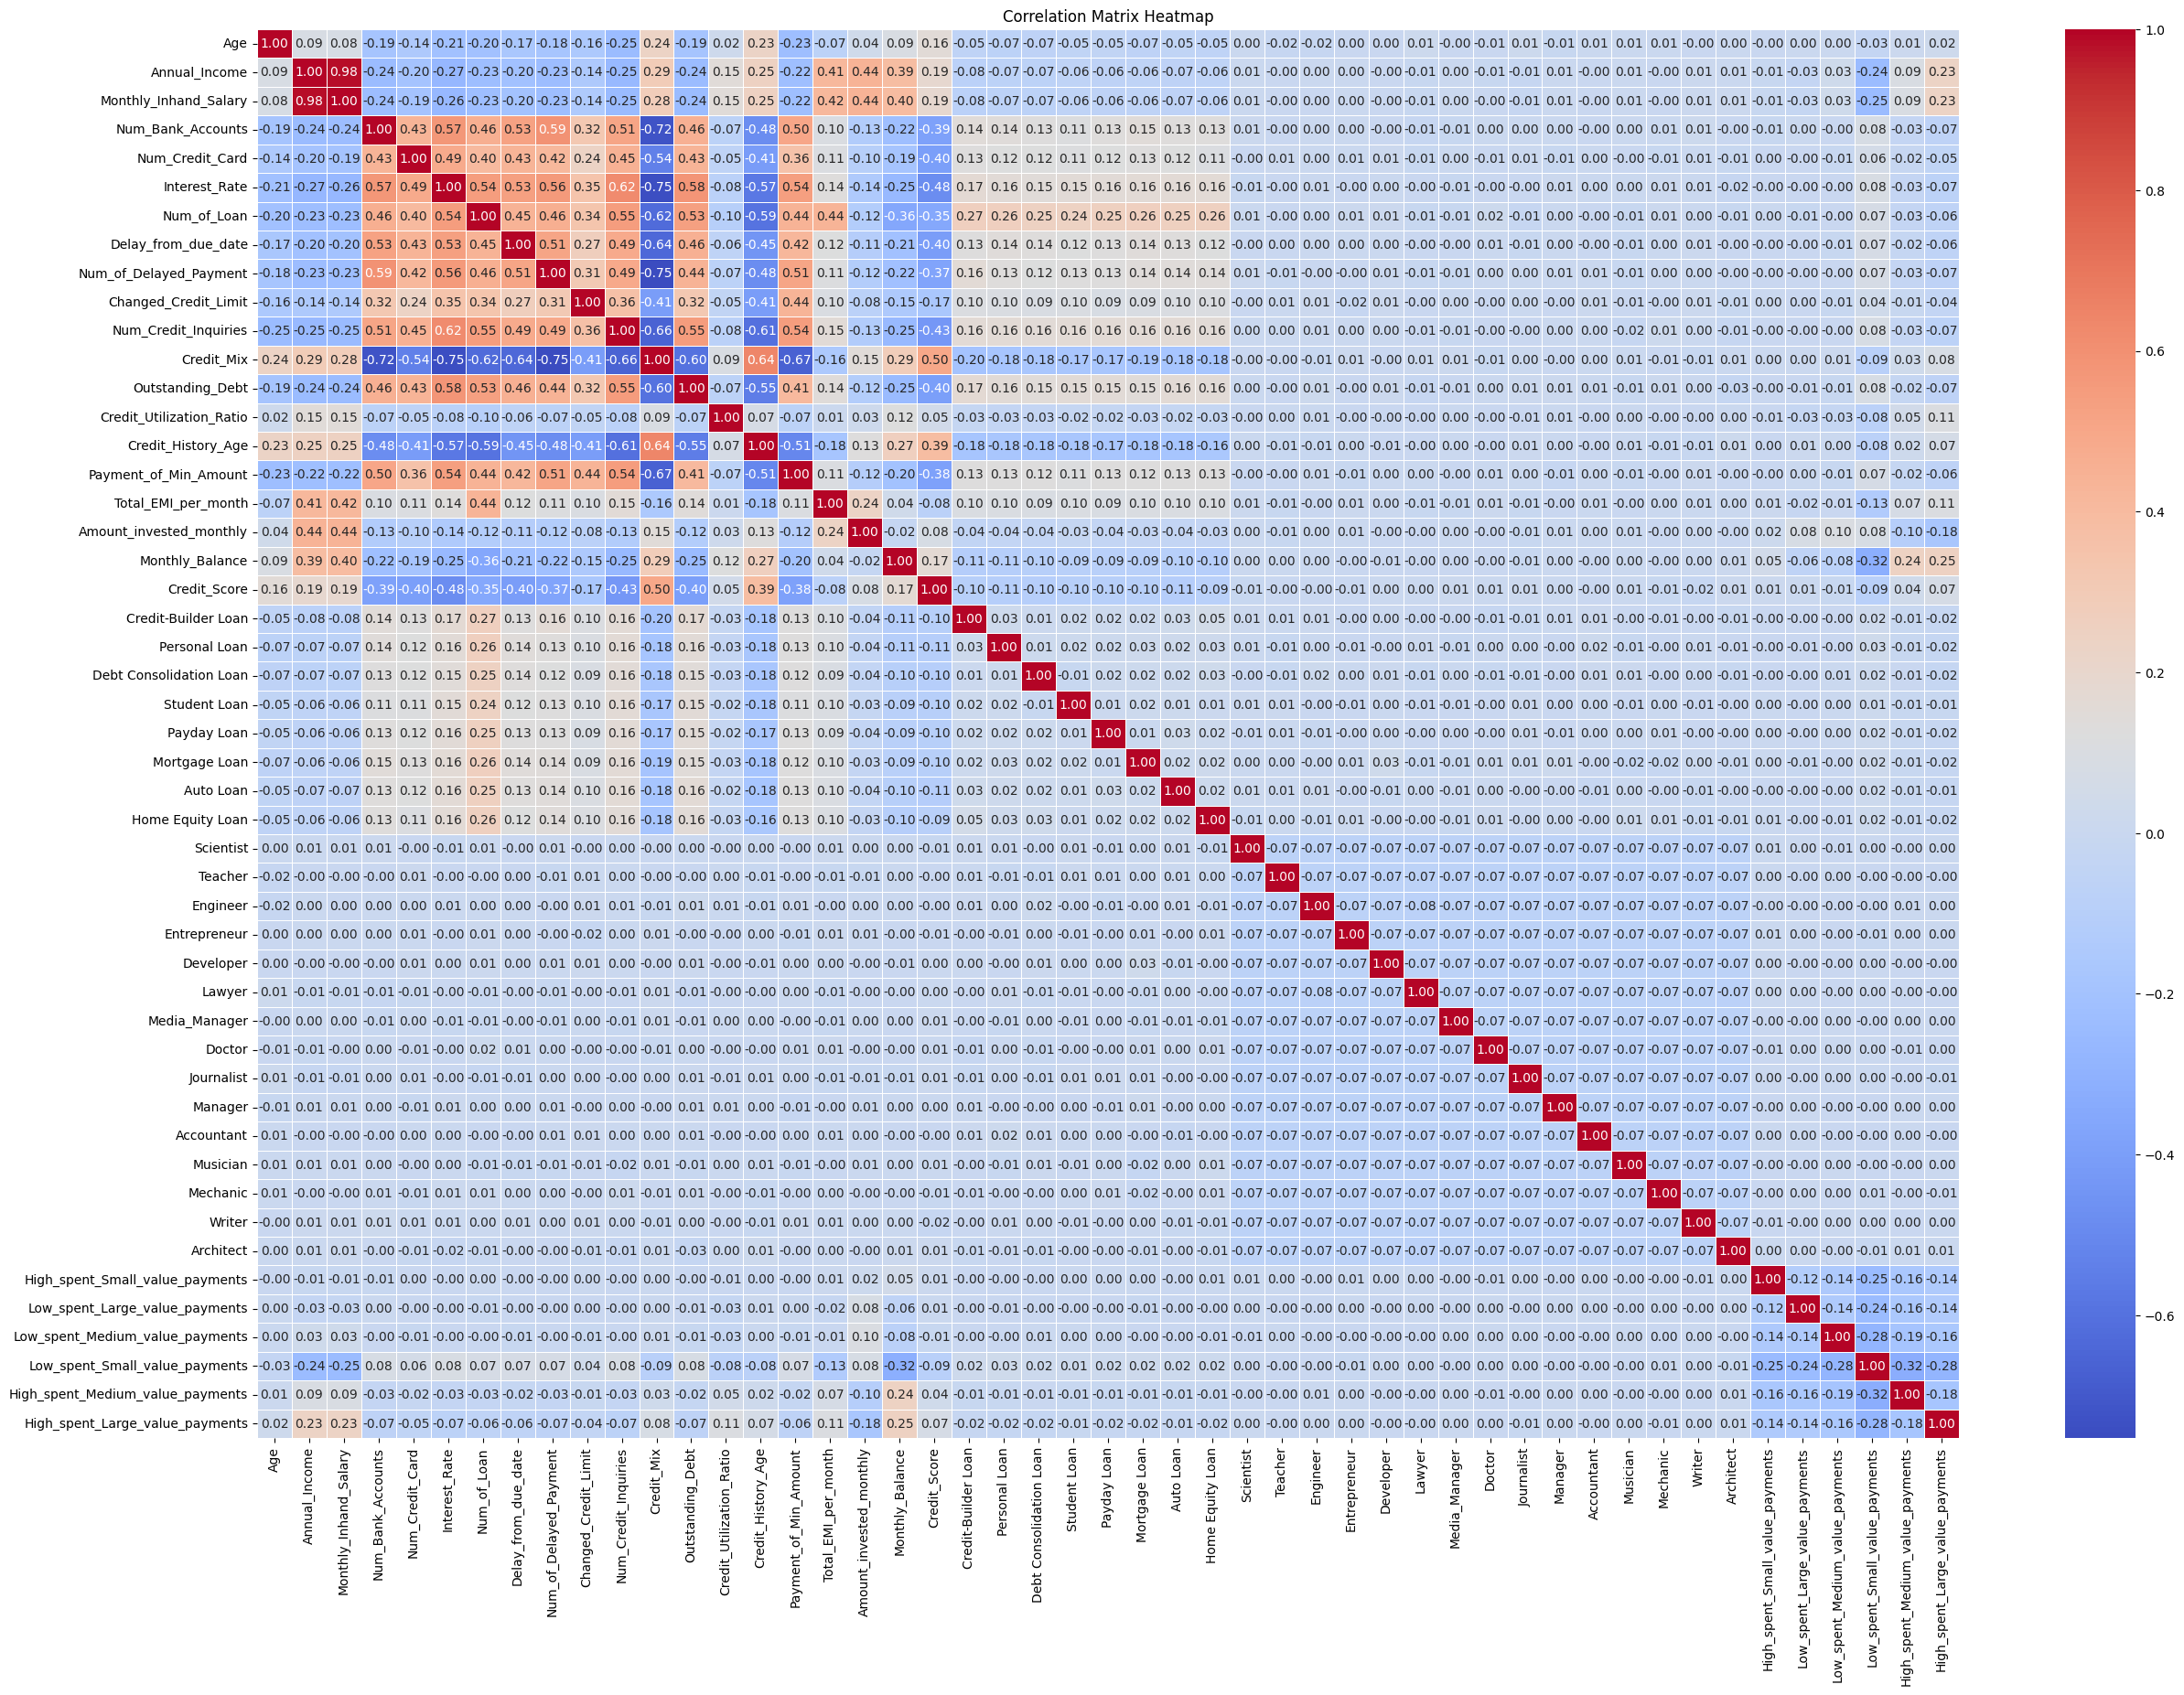

In [88]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()